Hola Yeray!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! Para darte un contexto, trabajo como cientifico de datos en Mercado Libre. Asi que seras revisado por alguien que aplica a diario todo este tipo de tecnicas en su vida laboral ! Espero una vez finalizes este bootcamp, tambien lo apliques ! Buena suerte !

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - *Por favor no mueves, modifiques o elimines los comentarios*.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

## Objectivo del Proyecto


In [38]:
#carga de librerias
import pandas as pd
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import matplotlib.pyplot as plt

In [39]:
# cargar archivo analisar 
try:
  file = "/datasets/games.csv"
  games = pd.read_csv(file)
except:
   file = '/programacion/Proyecto_Videojuegos_ice/datasets/games.csv'
   games = pd.read_csv(file) 

In [40]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [41]:
#cambiar nombre de columnas a minusculas 
games.columns = games.columns.str.lower()

In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [43]:
# convertir los tipos de datos 
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')
# cambiar los columna a tipo numerico
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')
# ahora rrellenar los valores no finitos 
games['year_of_release'].fillna(0, inplace=True)
# Redondear y cambiar la columna a tipo entero
games['year_of_release'] = games['year_of_release'].round().astype('int')

In [44]:
# cambiar los valores ausentes de "critic_score","user_score" un valor cero
columnas_change = ["critic_score","user_score"] 
games[columnas_change] = games[columnas_change].fillna(0)
# cambiar los valores de user_score de tbd a cero 
games["user_score"] = games["user_score"].replace('tbd', 0)

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
 se hizo la limpieza de los datos de la columnas "critic_score","user_score" a un valor cero a las se encuentran ausentes y en el caso de los valores user_score que tenia TBD remplazar un valor cero 
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Te falta realizar un poco de limpieza a los datas como user-sscore=tbd **HECHO**
</div>


# Describe las columnas en las que los tipos de datos han sido cambiados
se realizo el cambio de dos columnas la cuales son "year_of_release" y "user_score"

para  "year_of_release" la columna tenia como tipo de datos flotante , la cual seria in correcto dado que los años son entero asi que se hizo el cambio a enteros , aun de igual forma pudieron ser a string

para "user_score" para este caso que el usuario realiza un puntaje al video juego, lo idea que en vez "object" que antes tenia se tipo de datos cambiar un dato float dado que son puntajes 

# ¿Por qué crees que los valores están ausentes?

para los caso de columnas "Critic_score", "User_score" y "Rating " la razon por la cual creo los valores estan ausnetes:
1. por que las ventas del juego fueron malas en japon y no salieron a los otros paises
2. la consola de juegos o el juego en especial ya son bastante antiguos 
3. la ventas del juego no fueron buenas en general en todo los paises 
4. el titulo del juego no era muy conocido 
## que realizar en este caso
para las columnas "Critic_score", "User_score" y "Rating " los valores ausentes los cambiare para valor cero, dado que podria conciderar que son juegos que no podriamos hacer un gran analisi, pero en el caso de "Ranting" se dejara como un valor desconcido dado que nos sabemos la calificacion que se le da ese juego
## para los casos de TBD
por lo que podemos ver los tiene el caso de TBD son juegos que en japon, no lograron venderse bien pero salieron para otro paises , de igual forma son juegos que se lanzaron en el 2010 para abajo, que no tuvieron las mejores ventas.
asi para este caso cambiare el valor a cero

In [45]:
#Crear una columna con las ventas totales 
games["total_sales"] = games["na_sales"] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           0.0         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           0.0         0.0    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

In [46]:
#analisis de juegos lanzados por diferentes años
order_by_YearToGenre = games.groupby(['year_of_release'])['genre'].count()
print(order_by_YearToGenre)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: genre, dtype: int64


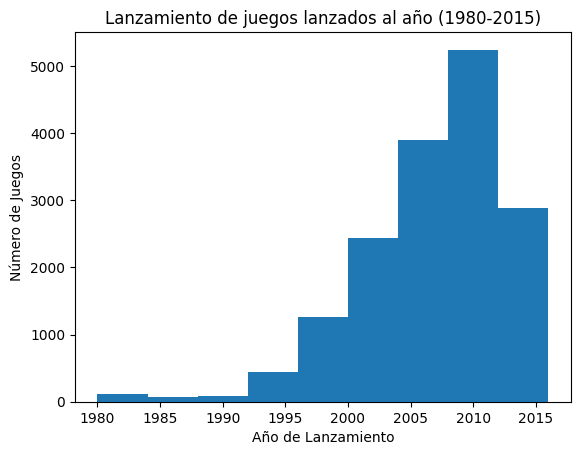

In [47]:
#Histograma representando la salida de los juegos por año
games_filter_year = games[games['year_of_release'] !=0]
plt.hist(games_filter_year['year_of_release'] ,bins=9)

# Añadir etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.title('Lanzamiento de juegos lanzados al año (1980-2015)')

# Mostrar la gráfica
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
<br>
Creacion de un histograma de la salida de los juegos en general por años 
<br>
Cambio de tipo de grafica para las ventas anuales de los juegos de la plataformas PS2 para se pueda apreciar mejor    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

La idea es mostrar cuantos juegos son lanzados en cada año en general. Para esto utiliza un histograma ejex=año ejey=conteo juegos lanzados **HECHO**
</div>


In [48]:
# analisis de varias de venta diferentes plataformas
order_by_TotalSales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(order_by_TotalSales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [49]:
# tomar en la plataforma con mas ventas y realizar una distribucion basada en los años
TopPlataform = games[games['platform'] == 'PS2']
distribucion = TopPlataform.groupby(['year_of_release'])['total_sales'].sum()
#ignoramos los datos que el año lo marcaba como cero
distribucion = distribucion[distribucion.index != 0]
print(distribucion)

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


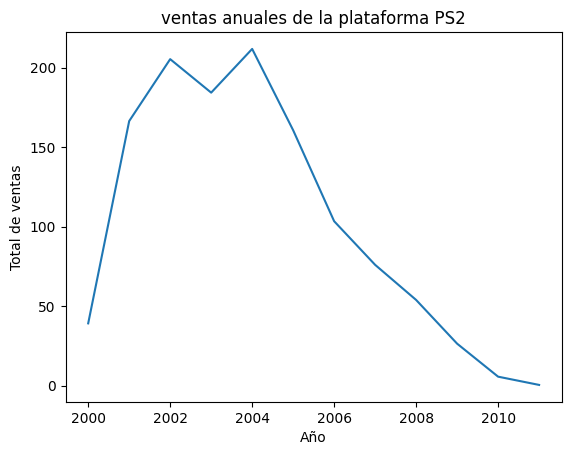

In [50]:
 # grafica de barras
distribucion.plot(x=distribucion.index,y=distribucion.values,title='ventas anuales de la plataforma PS2',xlabel='Año' ,ylabel='Total de ventas')
plt.show()

# una plataforma que antes era muy popular y actualmente no
Es el caso del ps2 

In [51]:
# hace un analisis en cuanto tiempo tardan en aprecer y desaparecer la plataformas
funciont_year = {'year_of_release': ['min','max']}
#quitar los valor 0 en year_of_release
filtered_games = games[games['year_of_release'] != 0]
#filtar por year de salida
lista_salida_plataformas = filtered_games.groupby('platform').agg(funciont_year).reset_index()
# hacer el columna en la cual muestre los años activos de plataforma(su periodo de vida de la plataforma)
lista_salida_plataformas['periodo_de_vida'] = lista_salida_plataformas[('year_of_release', 'max')] - lista_salida_plataformas[('year_of_release', 'min')]
# imprimir el filtrado de lista plataformas de menor a mayor 
print(lista_salida_plataformas.sort_values(by=('year_of_release', 'min')))

   platform year_of_release       periodo_de_vida
                        min   max                
0      2600            1980  1989               9
11      NES            1983  1994              11
4        DS            1985  2013              28
13       PC            1985  2016              31
5        GB            1988  2001              13
23     SNES            1990  1999               9
8       GEN            1990  1994               4
9        GG            1992  1992               0
22      SCD            1993  1994               1
12       NG            1993  1996               3
21      SAT            1994  1999               5
15       PS            1994  2003               9
1       3DO            1994  1995               1
24     TG16            1995  1995               0
14     PCFX            1996  1996               0
10      N64            1996  2002               6
3        DC            1998  2008              10
25       WS            1999  2001               2


In [52]:
# vamos a sacar una media al columna 'periodo de vida' para sacar el prmedio de tiempo que tarda en desaparecer una plataforma 
print(lista_salida_plataformas['periodo_de_vida'].median())

6.0


In [53]:
# hacemos un array con las fechas de lanzamiento del primera juego de la consola dado asi referencia de el año que salio la consola
fechas_lanzamiento= sorted(lista_salida_plataformas[('year_of_release', 'min')].unique())
# con los array de los valores unico de fecha de cada uno que existe , sacar la diferencia de tiempo 
duracion_intervalos = np.diff(fechas_lanzamiento)
# sacar el promedio tiempo
promedio_lanzamiento = np.mean(duracion_intervalos)

print("Duración de intervalos en fechas de salida:", duracion_intervalos)
print("Promedio de salida plataforma:", promedio_lanzamiento)

Duración de intervalos en fechas de salida: [3 2 3 2 2 1 1 1 1 2 1 1 1 3 1 1 5 1 1]
Promedio de salida plataforma: 1.736842105263158


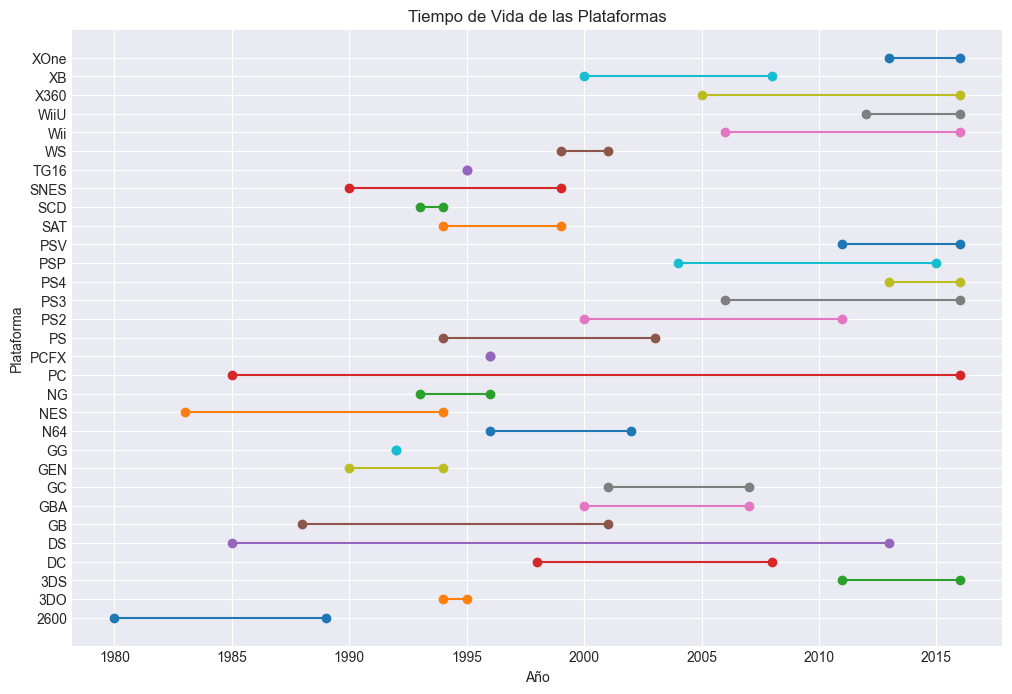

In [58]:
#Creacion de grafiaca del tiempo 
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-darkgrid')

# Loop a través de las filas del DataFrame y dibuja una línea para cada plataforma
for index, row in lista_salida_plataformas.iterrows():
    platform = row['platform']
    start_year = row[('year_of_release', 'min')]
    end_year = row[('year_of_release', 'max')]
    
    # Dibuja la línea para cada plataforma
    plt.plot([start_year, end_year], [index, index], marker='o')


plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Tiempo de Vida de las Plataformas')
plt.yticks(lista_salida_plataformas.index, lista_salida_plataformas['platform'])


plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
<br>
la creacion de un grafica de tiempo para que se puede, demostar el tiempo de vida de cada plataforma
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Debes mostra runa grafica de serie de tiempo por plataforma para poder analzisar el timepo de vida de cada plataforma. En Base a la grafica filtrar los ultimos años que desde que las nuevas plataformas nacieron (no yamyor a 5 años).**HECHO** Es valida tu grafica anterior
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Me gusta esta grafica, es bien clara el inicio y fin ! 
</div>


# cuanto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer 

Podemos decir que las plataformas antiguamentes como existian mayor competencia en el mercado de la plataformas de juegos salian mas consolas de juegos, podia llegar  a salir  plataformas de juegos en años consecutivos.
Pero dado que este mercado se a ido reduciendo en la creacion de diferentes plataformas de juegos,
el tiempo en aparecer un plataforma nueva actualmente puede ser de **5 años** y en desapareceer el interes de esta plaformas puede ser de **6 años** estos tomando en cuenta con mas datos 

# Periodo debemos tomar los datos 
para este caso considero que nos debemos tomar datos con una antigüedad no mayor a cinco años.
como esperamos hacer un modelos para el 2017 lo ideal seria tomar datos desde el 2012 para arriba 

In [ ]:
# filtrar un data framen con los años relevantes 
games_2012 = games[games['year_of_release'] >= 2012]
games_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [ ]:
#realizamos un filtrado por plataforma y sumamos su ventas totales
total_sales_of_plataform = games_2012.groupby(['platform'])['total_sales'].sum()
print(total_sales_of_plataform)

platform
3DS     194.61
DS       12.55
PC       62.65
PS3     288.79
PS4     314.14
PSP      11.19
PSV      49.18
Wii      35.37
WiiU     82.19
X360    236.54
XOne    159.32
Name: total_sales, dtype: float64


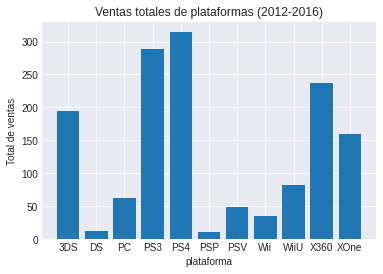

In [ ]:
plt.bar(total_sales_of_plataform.index, total_sales_of_plataform.values)
plt.title('Ventas totales de plataformas (2012-2016)')
plt.xlabel('plataforma')
plt.ylabel('Total de ventas')
plt.show()

# Plataformas potenciales 
por lo que podemos ver la plataforma potencial puede ser **3DS,PS3,PS4,X360,XONE** dato que lo que muestra el grafico de barras son las mejor ventas tiene en los años del 2012 a 2016

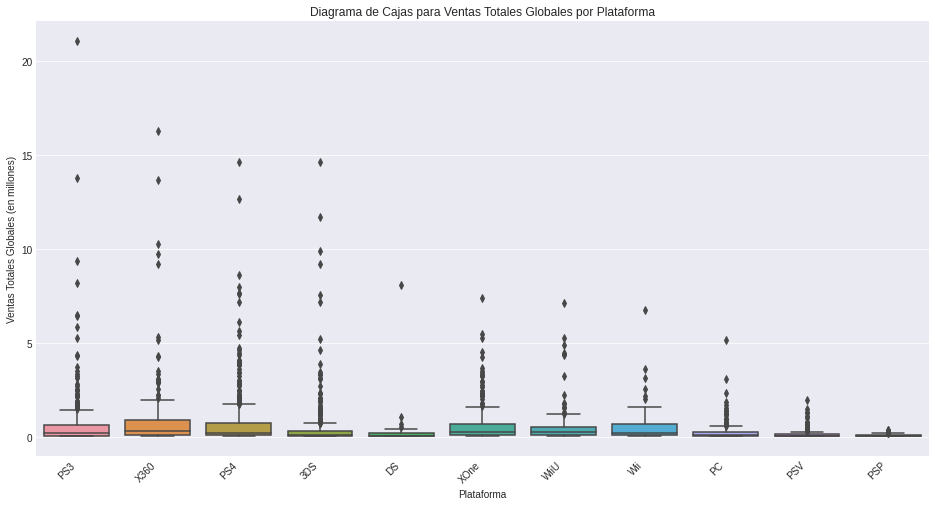

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=games_2012)

# Ajustar el diseño del gráfico
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visibilidad

# Agregar etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales Globales (en millones)')
plt.title('Diagrama de Cajas para Ventas Totales Globales por Plataforma')

# Mostrar el diagrama
plt.show()

# Hallazgos 
1. Para esto podemos decir que en el 2000 la Marca Sony con su pltaforma de PS2 tenia un gran mercado en las video consolas, pero los años 2010 dejo de ser un consola que se siguiera usando mas dado a las nuevas generaciones, los que puede llegar a ser soprendere es como *PC* es una de las plataforma que desde el 1985 se mantiene en el mercado de los video juego.

2. Podemos decir que para el 2011 para adelente la Marca Sony si siendo una de la plataformas en las cuales se hacen mas compra de juegos para su plataforma, dado que su dos modelos de PS3,PS4  de nueva generacion tiene las ventas mas altas en esta base de datos usamos para crear el modelo de prediccion para el 2017

3. Tambien podemos concluir que el periodo de vida que le podemos dar a un plataforma para la salida de una nueva, puede llegar ser de 5 a 6 años


<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
<br>
Agregacion de un conlusiones intermedias, con el titulo de 'Hallazgos'   
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Agrega conslusiones intermedias **HECHO**
</div>

# Describe tus hallazgos
podemos notar que tiene muchos valores antipicos encima del diagrama de caja eso nos quiere decir que existen valor o venta de juegos que salen del estandar esperada echo por la caja.
eso nos puede dar referencia que no todo el juegos puede llegar a tener el mismo exito de ventas dado que nuesto diagrama de caja no llega ni al los 5 millones , en nuestro valores antipicos existen valores que sobre pasan.


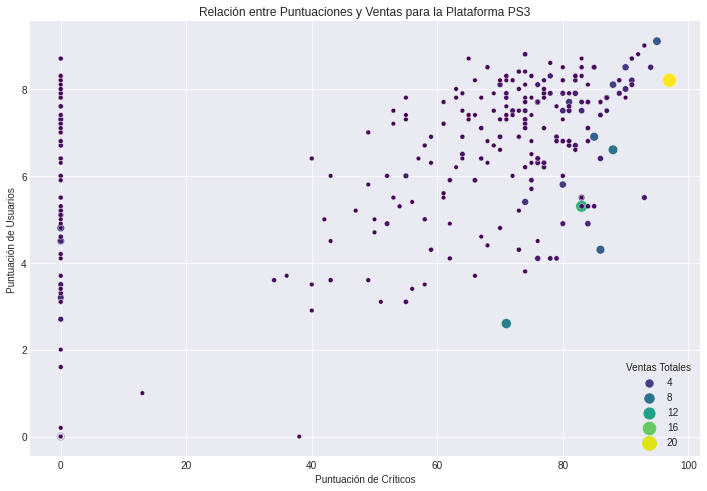

In [ ]:
# creacion de un grafica de dispercion respecto a criticas por profesionales y usuario, como esta influe en el las ventas
platform_of_interest = "PS3"
platform = games_2012[games_2012['platform'] == platform_of_interest]

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', y='user_score', size='total_sales', data=platform, hue='total_sales', palette='viridis', sizes=(20, 200))

plt.xlabel('Puntuación de Críticos')
plt.ylabel('Puntuación de Usuarios')
plt.title(f'Relación entre Puntuaciones y Ventas para la Plataforma {platform_of_interest}')


plt.legend(title='Ventas Totales')


plt.show()

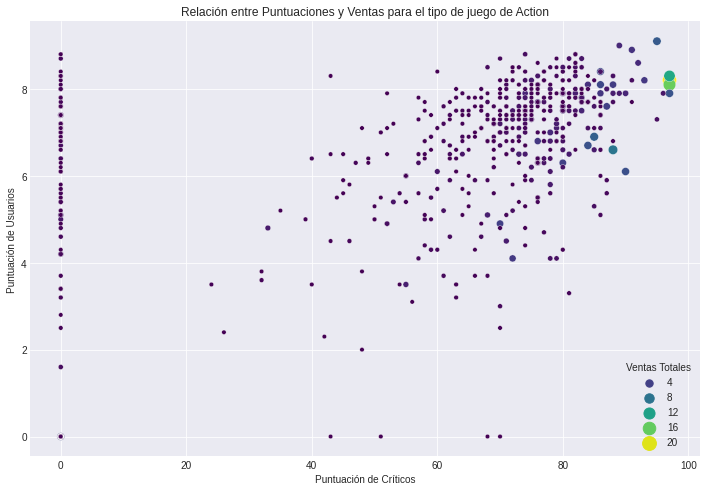

In [ ]:
# creacion de un grafica de dispercion respecto a criticas por profesionales y usuario, como esta influe en el las ventas
gener_of_interest = "Action"
platform = games_2012[games_2012['genre'] == gener_of_interest]

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', y='user_score', size='total_sales', data=platform, hue='total_sales', palette='viridis', sizes=(20, 200))

plt.xlabel('Puntuación de Críticos')
plt.ylabel('Puntuación de Usuarios')
plt.title(f'Relación entre Puntuaciones y Ventas para el tipo de juego de {gener_of_interest}')


plt.legend(title='Ventas Totales')


plt.show()

In [ ]:
 # realizamos la correlacion
correlation_matrix = platform[['critic_score', 'user_score', 'total_sales']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
              critic_score  user_score  total_sales
critic_score      1.000000    0.824809     0.309018
user_score        0.824809    1.000000     0.248856
total_sales       0.309018    0.248856     1.000000


<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
<br>
 Se creo un grafica de dispercion para los tipos de juegos dependiendo del scorer que dan los usuarios y los profesioneles
<br> 
 Dado que mas bajo realizo un grafica de barras por las ventas por cada tipo de juegos
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Te falta mostrar las ventas por tipo de juego **HECHO**</div>

# conclusiones de relacion de criticas con las ventas 
Podemos decir que en la grafica se nota que si existe un relacion con las criticas de los juegos a las ventas, dado que entre mejor puntajes la ventas tienda a ser altas.
Cuando hacemos la correlacion de criticas con venta, podemos ver que los datos si tiene una relacion pero el porcentaje que nos arroja parece ser que la relacion es debil.
En pero podemos decir que si existe un relacion muy positiva con las criticas de usuario y profesionales que esta tiene a tener lo mismo.

In [ ]:
# vamos a comprar la ventas de juegos con otras plataformas 
juegos_de_misma_plataformas = games_2012.groupby('name')['platform'].nunique()
juegos_de_misma_plataformas = juegos_de_misma_plataformas[juegos_de_misma_plataformas > 4].index.tolist()
#filtrar un dataframe con los juegos que estan diferentes plataformas
df_juegos_plataforma = games_2012[games_2012['name'].isin(juegos_de_misma_plataformas[1:11])]


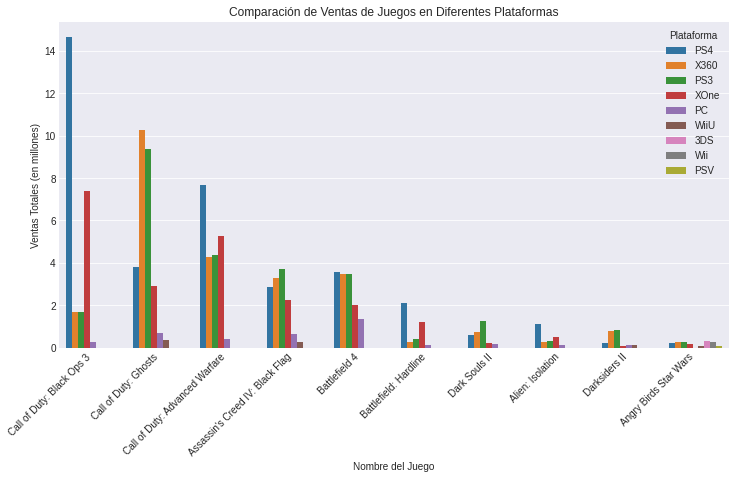

In [ ]:
#vamos a realizar un tabla para la comparaciones de los juegos vendidos en diferentes plataformas
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='total_sales', hue='platform', data=df_juegos_plataforma)

plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Comparación de Ventas de Juegos en Diferentes Plataformas')

plt.legend(title='Plataforma')

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# hacer distribucion de por genero 
ventas_por_genero = games_2012.groupby('genre')['total_sales'].sum()
print(ventas_por_genero)

genre
Action          441.12
Adventure        29.43
Fighting         44.49
Misc             85.04
Platform         61.00
Puzzle            4.89
Racing           53.50
Role-Playing    192.80
Shooter         304.73
Simulation       35.12
Sports          181.07
Strategy         13.34
Name: total_sales, dtype: float64


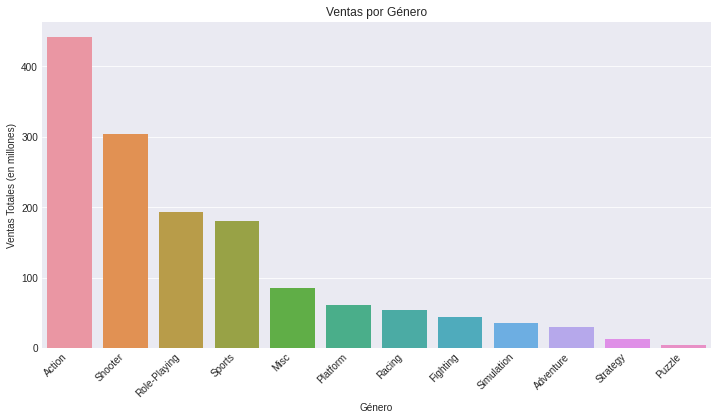

In [ ]:
#Creacion de grafica para la ventas por genero de juego 
sales_by_genre = games_2012.groupby('genre').sum().sort_values(by='total_sales', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_genre.index, y='total_sales', data=sales_by_genre)

plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Ventas por Género')

plt.xticks(rotation=45, ha='right')
plt.show()

# Hallazgos
1. los podemos determinar por esta filtracion de datos que realizamos podemos decir que las criticas de los usuarios y profesionales, influen en como iran en las ventas de un juegos a plataformas 

2. los criterior de los profesionales llegan a influir mucha en la critica de los usuarios a asi un juegos, asi que los profesinales hacen buenas criticas al juegos, es muy probable que los usuarios de igual forma den buenas criticas

3. podemos ver que en la comparacion de juegos en ventas de diferentes plataformas, usualmente la PS4 es el que tiene mayor ventas en los juegos

4. los juegos mas comprados son los de tipo accion

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
<br>
Agregacion de un conlusiones intermedias, con el titulo de 'Hallazgos'   
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Agrega conclusiones intermedias **HECHO**
</div>

# Observaciones de genero y ventas en juegos en la misma plataformas
Podemos ver que en la grafica donde comparamos los juegos vendidos en diferentes plataformas, existe un gran preferencia entre los modelos de sony y microsoft en este caso seria en su plataformas como PS4 o Xone , o algunas de su versiones anteriores de estar.

para que el caso de genero que puede a tener mas influencia en la ventas, con los juegos que esta relacionado en accion, en disparos , juegos de rol y de igual forma los juegos de deportes

In [ ]:
#sacamos las 5 plataformas pirncipales de venta de NA
top_plataform_NA = games_2012.groupby('platform')['na_sales'].sum().nlargest(5).index.tolist()
print(f'las 5 plataformas en que venden mas en NA son: {top_plataform_NA}')
#sacamos las 5 plataformas pirncipales de venta de EU
top_plataform_EU = games_2012.groupby('platform')['eu_sales'].sum().nlargest(5).index.tolist()
print(f'las 5 plataformas en que venden mas en EU son: {top_plataform_EU}')
#sacamos las 5 plataformas pirncipales de venta de JP
top_plataform_JP = games_2012.groupby('platform')['jp_sales'].sum().nlargest(5).index.tolist()
print(f'las 5 plataformas en que venden mas en JP son: {top_plataform_JP}')


las 5 plataformas en que venden mas en NA son: ['X360', 'PS4', 'PS3', 'XOne', '3DS']
las 5 plataformas en que venden mas en EU son: ['PS4', 'PS3', 'X360', 'XOne', '3DS']
las 5 plataformas en que venden mas en JP son: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']


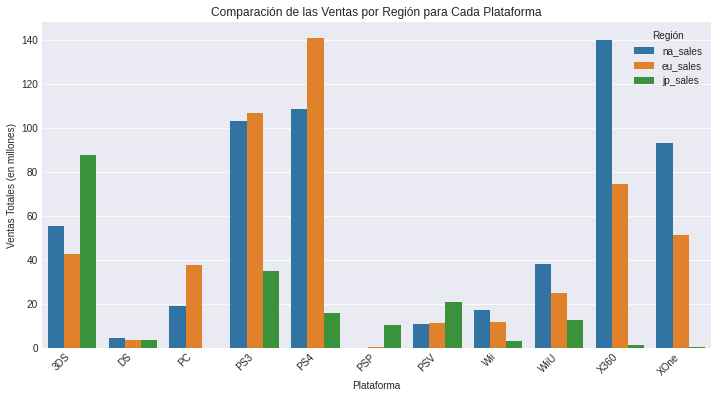

In [ ]:
# graficacion de la venta por region respecto a la plataforma 
venta_region = games_2012.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
venta_region = venta_region.reset_index().melt(id_vars='platform', var_name='region', value_name='sales')

# Crear el gráfico de barras comparativas
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='sales', hue='region', data=venta_region)

plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Comparación de las Ventas por Región para Cada Plataforma')

plt.legend(title='Región')
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
#sacamos las 5 plataformas pirncipales de venta de NA
top_genre_NA = games_2012.groupby('genre')['na_sales'].sum().nlargest(5).index.tolist()
print(f'los 5 genero de juegos en que venden mas en NA son: {top_genre_NA}')
#sacamos las 5 plataformas pirncipales de venta de EU
top_genre_EU = games_2012.groupby('genre')['eu_sales'].sum().nlargest(5).index.tolist()
print(f'los 5 genero de juegos en que venden mas en EU son: {top_genre_EU}')
#sacamos las 5 plataformas pirncipales de venta de JP
top_genre_JP = games_2012.groupby('genre')['jp_sales'].sum().nlargest(5).index.tolist()
print(f'los 5 genero de juegos en que venden mas en JP son: {top_genre_JP}')


los 5 genero de juegos en que venden mas en NA son: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
los 5 genero de juegos en que venden mas en EU son: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
los 5 genero de juegos en que venden mas en JP son: ['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']


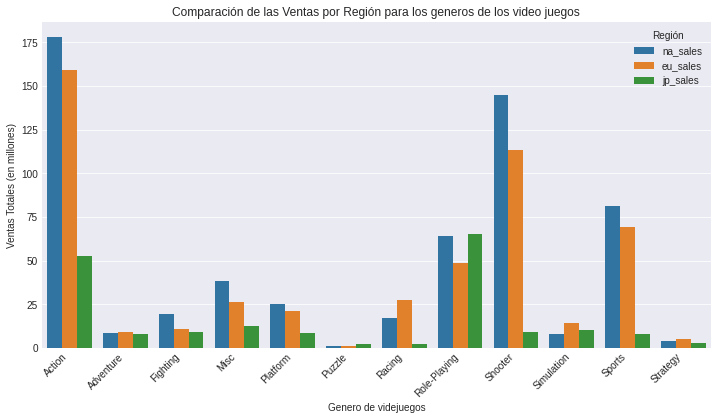

In [ ]:
# graficacion de los ventas por region respecto al genero del juego
venta_genre_region = games_2012.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
venta_genre_region = venta_genre_region.reset_index().melt(id_vars='genre', var_name='region', value_name='sales')

# Crear el gráfico de barras comparativas
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='sales', hue='region', data=venta_genre_region)

plt.xlabel('Genero de videjuegos')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Comparación de las Ventas por Región para los generos de los video juegos')

plt.legend(title='Región')
plt.xticks(rotation=45, ha='right')

plt.show()

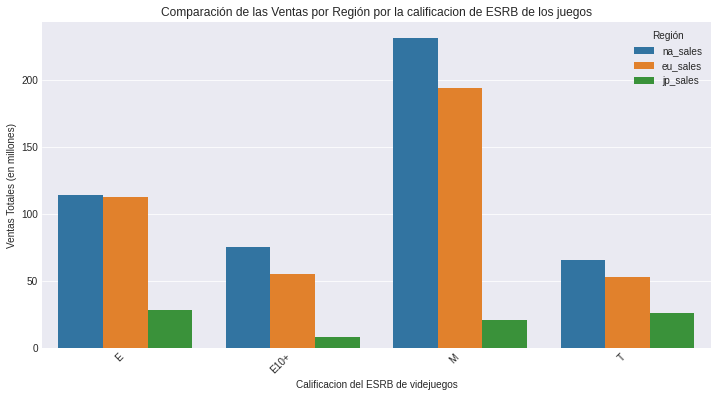

In [ ]:
# graficacion de las ventas respecto a calificacion del  ESRB
venta_rating_region = games_2012.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
venta_rating_region = venta_rating_region.reset_index().melt(id_vars='rating', var_name='region', value_name='sales')

# Crear el gráfico de barras comparativas
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='sales', hue='region', data=venta_rating_region)

plt.xlabel('Calificacion del ESRB de videjuegos')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Comparación de las Ventas por Región por la calificacion de ESRB de los juegos')

plt.legend(title='Región')
plt.xticks(rotation=45, ha='right')

plt.show()

# Explicacion de los resultado de esta filtraciones 
Podemos ver que en las filtraciones que generamos para el genero y plataformas en la ventas de cada una de las regiones podemos tonar que las regiones de EU y NA tiende ser similares que los gusto que quieren, por otro lado la region JP es totalmente diferentes este aspecto, el mercado JP va mas para la los productos de nintendo y en cambio el mercado de EU y NA; Tiene mas interes en el los productos de sony o microsoft.

Respecto a la calificacion de los juegos, como estas calificaciones puede enfluien en la ventas de als regiones podemos darnos cuenta que los juegos tiene calificacion M tiene buenas ventas en las regiones de NA y EU, en diferencia de la region de JP que tiene a tener una buena base en las diferentes calificaciones menos en E10+,pero la tiene mas ventas es en E.


# Relizacion de pruebas de hipotesis 

# 1 Hipotesis 
hipotesis nula(HO):<br>
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

hipotesis alterna(H1):<br>
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las diferentes.

In [ ]:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
score_mean_user_pc = games_2012[games_2012['platform'] == 'PC']
score_mean_user_XOne =  games_2012[games_2012['platform'] == 'XOne']
# umbral alfa 
alpha = 0.05
# realizar los calculos 
results = st.ttest_ind(score_mean_user_pc['user_score'], score_mean_user_XOne['user_score'], equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.06811033795099536
No podemos rechazar la hipótesis nula


# 2 Hipotesis 
hipotesis nula(HO):<br>
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

hipotesis alterna(H1):<br>
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son mismo.

In [ ]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
score_mean_user_Accion = games_2012[games_2012['genre'] == 'Action']
score_mean_user_Deportes =  games_2012[games_2012['genre'] == 'Sports']
# umbral alfa 
alpha = 0.05
# realizar los calculos 
results = st.ttest_ind(score_mean_user_Accion['user_score'],score_mean_user_Deportes['user_score'], equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.014166975726904863
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Todobien con las hipotesis ! 
</div>

# Explicacion de resultados de la prueba de hipotesis 
Como realizamos la formulacion de la prueba de hipotesis de nula y alterna, esto fue dependiendo de los resultados deseados en el caso de la hipostesis se plantea con el resultado esperado a obtener y la alterna es un resultadao no espera o contrario a lo buscado.

Para la selecion de le umbral alfa usamos un alfa de 0.05  nivel de significancia comúnmente utilizado.  estámos dispuesto a aceptar un 5% de probabilidad de cometer un error

# Caso 1 Hipotesis resultado 
Con los resultados obtenidos de la prueba de hipostesis , podemos decir que: <br>
Que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, dado que el valor que calculamos es mayor que el valor de alfa , asi que existe ese similitud que son las mismas

# Caso 2 Hipotesis resultado
Con los resultados obtenidos de la prueba de hipostesis , podemos decir que: <br>
Que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, en este caso los valores nos arroja que es menor el valor alfa , asi se sugiere rechazar la hipotesis nula.
Dando entender que los valores promedios de los usarios respecto los generos de accion y deporte son similares, se puede decir son las mismas